In [11]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from src.env.DunderBotEnv import DunderBotEnv
import src.run as run
import src.load as load

loading config from config/config.yml
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.util.config import get_config
config = get_config()

# TODO:

- Constant reminder: Add more checks and tests
- Normalize observations
    * VecNormalize Example: https://github.com/hill-a/stable-baselines/issues/694
    * Counld help: https://github.com/hill-a/stable-baselines/issues/736
- BUG: trade seems off sync (reproducable by predicting for few, like 30, timesteps
- Add env checker
- understand the rendering during learning
- self.stationarize_rewards?
- Change policy network (need to understand terminology surronding it, e.g. envoronment, n_steps etc). See also discussion here (and elsewhere among Issues: https://github.com/hill-a/stable-baselines/issues/759)
- Check/Enable/Add exploration noise (for PPO2, use the entropy flag), use https://stable-baselines.readthedocs.io/en/master/common/schedules.html
- lock down the seeds (and decide in config from a few specific ones)
- setup performance output, what we need to make data driven decision
    *e.g. https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/master/1_getting_started.ipynb#scrollTo=63M8mSKR-6Zt
- Add benchmarks
- Find as long time series of BTCUSD hourly data as possible, quite shortright now
- Add finer temporal resolution in data (generate/download multiple granularity)
- untangle index weirdness (basically, try to enable prediction the last timestep, and make running interface easier (and more robust))
    * Check info box for reason and solution: https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html
    * This might also help (at the end) https://github.com/hill-a/stable-baselines/issues/779
    * LOW PRIO, since we might change the padding structure if we apply LSTM policy network
- Hyperparameter search
- Check float number type



# DONE: 
- add config
- modularize rewards
- own actions
- add more detailed actions for buy and sell amounts (still Discrete, I believe)
- wrap running code in function in main.py (to enable more dynamic data loading and train/test)
- own observations
- remove the bias when getting the observations (suggestion in the repo issues)
- download more interesting data and manually preprocess
- load interesting data, specified in config
- understand the time steps in learn and predict
- setup basic monitoring of training using TensorBoard
- Visualize basic performance
- Add support for fractions of shares
- Understand what should belong in what timestep (also decide on which price to plot as a result)
- add distributions of actions as output during prediction
- Refactor `_take_action` (might be something off in some calculations, also update terminology)
- Add commission and slippage
- Refactor current reward and add some new ones
- Add smallest amount of bitcoin we can own, as well as trading precision
- Add portfolio features
- Add reward output
- setup train/test functionality
- Enable saving/loading trained models



# Run

In [5]:
%%time
df = load.load_OHLC_data()
env = run.preprocess(df=df)
model = run.train(env=env, timesteps=int(2e4))





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Resetting to timesteps: start 9, end 21628.
--------------------------------------
| approxkl           | 0.00021259204 |
| clipfrac           | 0.0           |
| explained_variance | -0.61         |
| fps                | 110           |
| n_updates          | 1             |
| policy_entropy     | 2.196995      |
| policy_loss        | -0.00811515   |
| serial_timesteps   | 128           |
| time_elapsed       | 0.000196      |
| total_timesteps    | 128           |
| value_loss         | 0.6506353     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0002991244  |
| clipfrac           | 0.0           |
| explained_variance | -0.285        |
| fps                | 140           |
| n_updates    

--------------------------------------
| approxkl           | 0.00014284204 |
| clipfrac           | 0.0           |
| explained_variance | 0.217         |
| fps                | 88            |
| n_updates          | 80            |
| policy_entropy     | 2.149245      |
| policy_loss        | -0.002447815  |
| serial_timesteps   | 10240         |
| time_elapsed       | 97.8          |
| total_timesteps    | 10240         |
| value_loss         | 0.012325531   |
--------------------------------------
--------------------------------------
| approxkl           | 0.0002610352  |
| clipfrac           | 0.0           |
| explained_variance | 0.278         |
| fps                | 96            |
| n_updates          | 90            |
| policy_entropy     | 2.0424764     |
| policy_loss        | -0.0017450659 |
| serial_timesteps   | 11520         |
| time_elapsed       | 112           |
| total_timesteps    | 11520         |
| value_loss         | 0.0007227158  |
-------------------------

In [8]:
%%time
timesteps = config.train_test.test_timesteps - config.data_n_timesteps - 1
obs_all = run.predict(df=df, timesteps=timesteps, rendermode='none')

Loading files from /tmp/
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Model connected with env
Predicting for 4989 timesteps
Resetting to timesteps: start 21638, end 26628.
CPU times: user 36.8 s, sys: 1.68 s, total: 38.5 s
Wall time: 37.3 s


# Show high low obs values

In [44]:
test_max = [np.max(obs) for obs in obs_all]
test_min = [np.min(obs) for obs in obs_all]


19.84886575296198
-1.933742228792272


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

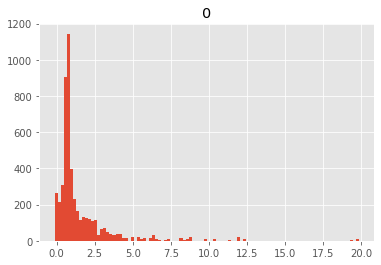

In [45]:
print(np.max(test_max))
print(np.min(test_min))
test_df = pd.DataFrame(test_max)
test_df.hist(bins=100)

In [6]:
import pickle
with open('all_dict_pred.pickle', 'rb') as f:
    x = pickle.load(f)
x

{'current_step': 18,
 'net_worths': [10000.0,
  10000.0,
  10000.0,
  10001.7,
  9993.31,
  9845.08,
  9818.83,
  9857.64,
  9811.18,
  9826.9,
  9849.13,
  9841.65,
  9846.6,
  9906.72,
  9857.82,
  9825.55,
  9844.28,
  9835.73,
  9843.79,
  9853.91,
  9847.28,
  9858.84,
  9884.08,
  9846.62,
  9846.11,
  9859.04,
  9865.74,
  9849.82,
  9871.96,
  9886.04,
  9852.41,
  9828.36,
  9781.67,
  9796.26,
  9789.61,
  9787.16,
  9798.66,
  9821.71,
  9819.04,
  9825.21,
  9813.02,
  9817.28,
  9809.9,
  9810.35,
  9815.73,
  9852.16,
  9844.47,
  9845.15,
  9833.28,
  9836.58,
  9863.32,
  9843.26,
  9846.9,
  9838.6,
  9843.73,
  9840.44,
  9971.54,
  9981.18,
  9980.54,
  9981.68,
  9980.22,
  9984.06,
  10005.04,
  9992.58,
  9998.53,
  10012.4,
  10006.93,
  9995.75,
  9951.78,
  9922.8,
  9824.37,
  9840.96,
  9803.94,
  9764.1,
  9780.03,
  9798.29,
  9787.19,
  9793.24,
  9805.33,
  9789.97,
  9796.14,
  9795.5,
  9814.97,
  9812.16,
  9803.83,
  9817.89,
  9804.12,
  9807.79,
  9

In [8]:
x.keys()

dict_keys(['current_step', 'net_worths', 'trades', 'account_history', 'rewards'])

In [8]:
import pandas as pd
net_worths = pd.Series(x['net_worths'], index=range(self.start_step, self.end_step+1))

NameError: name 'self' is not defined

# Testing norm

In [5]:
import json
import datetime as dt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines import PPO2
from stable_baselines.common.env_checker import check_env

import numpy as np
import pandas as pd
import gym
from src.env.DunderBotEnv import DunderBotEnv

from src.util.config import get_config
config = get_config()

In [6]:
df = load.load_OHLC_data()

In [7]:
# The algorithms require a vectorized environment to run
env = DunderBotEnv(df=df, train_test='train')
# check env is designed correctly
#check_env(env)
env = DummyVecEnv([lambda: env])
env = VecNormalize(env, training=True, norm_obs=True, norm_reward=True)
#env.training = True

In [8]:
model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000, log_interval=10)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Resetting to timesteps: start 9, end 21628.
---------------------------------------
| approxkl           | 0.000115714734 |
| clipfrac           | 0.0            |
| explained_variance | -0.00396       |
| fps                | 100            |
| n_updates          | 1              |
| policy_entropy     | 2.1970978      |
| policy_loss        | -0.0051387176  |
| serial_timesteps   | 128            |
| time_elapsed       | 2.98e-05       |
| total_timesteps    | 128            |
| value_loss         | 0.5718361      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00028202255 |
| clipfrac           | 0.0           |
| explained_variance | -1.23         |
| fps                | 140           |
| n

In [21]:
env.normalize_obs(obs)

array([[[ -0.14877873,  -0.14548887,  -0.14675604,  -0.15258195,
          -0.1515709 ,  -0.14942067,  -0.14840986,  -0.14626041,
          -0.14638997,  -0.14766099,          nan,          nan,
                  nan,          nan,          nan,          nan,
                  nan,          nan,          nan,          nan,
          -0.01733701,          nan, -10.        ]]])

In [9]:
# Same env as above, but with different train_test setting
env = DunderBotEnv(df=df, train_test='test')
env = DummyVecEnv([lambda: env])
#env = VecNormalize(env, norm_obs=True, norm_reward=False)
#env.training = False
obs = env.reset()

done = False
for i in range(42):
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)

Resetting to timesteps: start 21638, end 26628.


In [10]:
obs

array([[[7.1400e+03, 7.1520e+03, 7.1480e+03, 7.1280e+03, 7.1320e+03,
         7.1400e+03, 7.1440e+03, 7.1520e+03, 7.1520e+03, 7.1480e+03,
         1.6938e+02, 8.7875e+01, 1.6112e+02, 2.5925e+02, 8.6938e+01,
         1.1644e+02, 1.4025e+02, 1.2188e+02, 9.1062e+01, 8.6750e+01,
         7.0900e+02, 1.0064e+04, 1.3076e+00]]], dtype=float16)

In [14]:
import numpy as np

In [16]:
np.isinf(obs).any()

True

<AxesSubplot:>

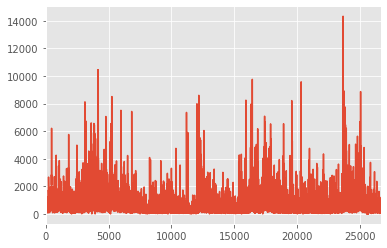

In [11]:
df.VolumeBTC.plot()